<a href="https://colab.research.google.com/github/Tejas-Chaudhari-007/EE-769-Introduction-to-Machine-Learning/blob/main/Tutorials/Tutorial_3_Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 3
## Q.5 


In [ ]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

### (a) 
Generate a range of values for independent (input) variable x.

In [ ]:
# Generate range of values for independent input variable x
n = 100  # Total number of data points
x_vector = np.random.uniform(low=-2, high=3, size=n)  # Draws n samples from uniform distribution within given range
print('Input variable x', np.around(x_vector,decimals=1))

Input variable x [-1.1  2.9  2.2 -0.9  1.3  0.5  2.4  1.4  2.8  0.7  1.9 -1.5  1.3  0.4
 -1.1  1.4  0.1  2.8  2.4 -1.9 -0.7  0.4  1.4 -1.2  0.2  0.2 -1.4  1.3
 -1.9  1.4 -1.4  2.1 -1.6  2.6  1.2 -0.7  0.  -1.5  0.4  2.5 -0.8 -0.2
  2.  -1.3 -0.6  2.2 -1.9 -0.7  2.5  1.9  3.   1.9  3.   1.8  0.8 -1.8
  0.6  1.9  2.9 -1.2 -1.8  0.9  2.8  2.8  1.2 -1.3 -1.3  2.7  1.4 -1.6
  2.  -1.6 -1.1  2.8  0.7  1.8 -1.6 -0.5  2.6  2.9 -0.4  0.4 -0.2  1.1
 -0.3  1.3 -0.3  0.2  2.4  0.2 -1.1  0.  -0.4 -1.1  1.3  0.9  0.4 -1.2
  1.2  1.1]


### (b) 
Generate the dependent (output) variable t as a third-degree polynomial of x plus
some IID random Gaussian noise with 0 mean and a fixed variance. Initially, keep
the variance as 0. Plot x and t as a scatter plot, and plot the ideal polynomial
curve in the same figure overlaid.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # Remove the CWD from sys.path while we load stuff.


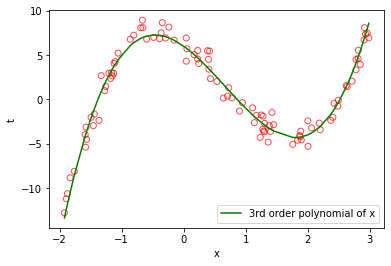

In [ ]:
# Define 3rd order polynomial of x and output variable 't' with noise sampled from Gaussian distribution
coeff_list = [2, -4, -5, 6]
P3_x_vector = np.polyval(coeff_list, x_vector) # Polynomial of x with degree 3
noise = np.random.normal(loc=0, scale=1, size=n)  # Draw n samples from Gaussian distribution from given mean and standard deviation
t_vector = P3_x_vector + noise  # Generate Target variable

# Plot 't' vs 'x' and '3rd order polynomial of x' vs 'x' in same plot
f, ax = plt.subplots(1)
ax.plot(np.sort(x_vector), np.polyval([2, -4, -5, 6], np.sort(x_vector)), label='3rd order polynomial of x', color='green')
ax.scatter(x_vector, t_vector, marker='o', color='', edgecolors='red', alpha=0.7)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.legend()

### (c)
Generate x as a vector of powers of x, including x0. With all the samples, this will
become the data matrix X.

In [ ]:
# Generate data matrix
x_matrix = np.column_stack((coeff_list[0]*x_vector**3, coeff_list[1]*x_vector**2, coeff_list[2]*x_vector**1, coeff_list[3]*x_vector**0))  # Input matrix
data_df = pd.DataFrame(np.column_stack((x_matrix,t_vector)), columns=['Power_3', 'Power_2', 'Power_1', 'Power_0', 'Target'])  # Input and target  
data_df.round(1) # Display rounded DataFrame with 1 digit

,Power_3,Power_2,Power_1,Power_0,Target
0,-2.4,-4.5,5.3,6.0,5.2
1,49.1,-33.8,-14.5,6.0,6.7
2,21.3,-19.4,-11.0,6.0,-3.4
3,-1.3,-3.0,4.3,6.0,6.8
4,4.1,-6.5,-6.4,6.0,-3.4
...,...,...,...,...,...
95,1.7,-3.6,-4.7,6.0,-0.4
96,0.1,-0.6,-1.9,6.0,5.5
97,-3.5,-5.8,6.0,6.0,2.9
98,3.2,-5.5,-5.9,6.0,-1.8


### (d)
Solve the linear regression using pseudo-inverse, and observe if the procedure can
estimate the coecients of the polynomial. Overlay the estimated polynomial y in
the same figure.

Useful resource:
1D array and row vector, column vector (taking transpose of 1D arrays):
https://note.nkmk.me/en/python-numpy-transpose/

Note on np.reshape():
The length of the dimension set to -1 is automatically determined by inferring from the specified values of other dimensions. This is useful when converting a large array shape.

Note on matrix multiplication:
np.matmul(x, y) was observed to give same answer as x.dot(y)

In [ ]:
# Find weights
pinv_x_matrix = np.linalg.pinv(x_matrix) # Pseudo inverse of x matrix
identity_matrix = np.matmul(pinv_x_matrix, x_matrix) # Verification of the pseudo inverse
print('\n Identity matrix: \n', identity_matrix)
w_vector = pinv_x_matrix.dot(t_vector)
print('\n Estimated coefficients: \n', w_vector)

# Find y (estimates of target)
y_vector = x_matrix.dot(w_vector) 
print('\n y: \n', y_vector)

# Plot
ax.scatter(x_vector, y_vector, label='y')


 Identity matrix: 
 [[ 1.00000000e+00 -3.37504271e-16 -5.08151097e-16 -3.56919355e-16]
 [ 4.80578656e-16  1.00000000e+00 -3.61309063e-16 -1.39130244e-16]
 [ 3.82668168e-16 -1.34143023e-16  1.00000000e+00 -1.35308431e-16]
 [ 8.75454726e-17 -6.24375058e-17  1.26911769e-16  1.00000000e+00]]

 Estimated coefficients: 
 [0.99402575 1.00069294 1.00307608 1.01392874]

 y: 
 [  4.56632254   6.51577538  -3.14964824   6.17463326  -2.69499894
   2.55093183  -1.27667013  -3.5345047    3.87989059   1.23270265
  -4.28546981  -1.22534069  -2.72613247   3.43385635   4.06941472
  -3.32995481   5.81315662   4.58210817  -1.81802107 -12.19382094
   6.97757192   3.51924754  -3.43146662   3.20229762   5.1435338
   4.77660421   0.43063015  -2.7737482  -13.16959163  -3.23720352
  -0.93357253  -3.853466    -3.8360157    1.45521454  -2.46427943
   7.06352485   5.87035332  -1.9642595    3.55975639  -0.49361382
   6.50006504   6.75198159  -4.05107241   2.11622106   7.22797073
  -3.2526126  -11.62810046   7.08435

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  import sys


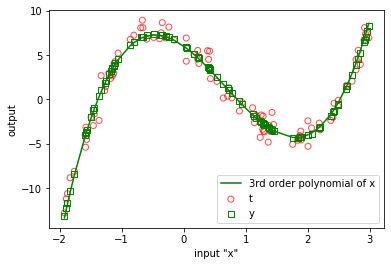

In [ ]:
# Plot 3rd degree polynomial, t and y in one plot
f, ax = plt.subplots(1)
ax.plot(np.sort(x_vector), np.polyval([2, -4, -5, 6], np.sort(x_vector)), label='3rd order polynomial of x', color='green')  # Plot of P3(x) vs x
ax.scatter(x_vector, t_vector, label='t', marker='o', color='', edgecolors='red', alpha=0.7)  # target vs input
ax.set_xlabel('input "x"')
ax.set_ylabel('output')
ax.scatter(x_vector, y_vector, label='y', color='', edgecolors='green', marker='s',)  # Estimates vs input
ax.legend()

### (e)
Increase the variance of the noise, and observe the impact on the estimated poly-
nomial coecients, and the variance of the plot, by repeating the process multiple
times for the same noise variance.

In [ ]:
for noise_variance in np.arange(2, 3, 1):
    for sample in np.arange(1, 5, 1):       
        # Data split (train:test = 70:30)
        # train_df, test_df = train_test_split(new_data_df, train_size=0.7, test_size=0.3, random_state=sample, shuffle=True) # Setting random_state would give same 5 samples every time we execute the code
        # display(train_df.round(2))
        # display(test_df.round(2))

        # Sample new noise from Gaussian distribution with given variance
        new_noise = np.random.normal(loc=0, scale=noise_variance, size=100)  

        # Define the updated target variable
        new_t_vector = P3_x_vector + new_noise

        # Define new Dataframe for the data to avoid over-writing the previous one
        new_data_df = data_df

        # Update the new target in the data
        new_data_df['Target'] = new_t_vector

        display(data_df.round(2))
        display(new_data_df.round(2))

        # Define the updated coefficients  
        new_w_vector = np.linalg.pinv(x_matrix).dot(new_t_vector)
        
        break



,Power_3,Power_2,Power_1,Power_0,Target
0,-2.36,-4.47,5.28,6.0,0.16
1,49.13,-33.80,-14.53,6.0,5.59
2,21.32,-19.37,-11.00,6.0,-4.20
3,-1.27,-2.96,4.30,6.0,8.95
4,4.14,-6.50,-6.37,6.0,-7.27
...,...,...,...,...,...
95,1.69,-3.58,-4.73,6.0,-1.00
96,0.11,-0.59,-1.92,6.0,6.19
97,-3.50,-5.81,6.02,6.0,1.36
98,3.21,-5.48,-5.85,6.0,-2.38


,Power_3,Power_2,Power_1,Power_0,Target
0,-2.36,-4.47,5.28,6.0,0.16
1,49.13,-33.80,-14.53,6.0,5.59
2,21.32,-19.37,-11.00,6.0,-4.20
3,-1.27,-2.96,4.30,6.0,8.95
4,4.14,-6.50,-6.37,6.0,-7.27
...,...,...,...,...,...
95,1.69,-3.58,-4.73,6.0,-1.00
96,0.11,-0.59,-1.92,6.0,6.19
97,-3.50,-5.81,6.02,6.0,1.36
98,3.21,-5.48,-5.85,6.0,-2.38


In [ ]:
print(new_t_vector)
print(t_vector)

[  0.16345198   5.58778698  -4.19871996   8.95368638  -7.27151889
  -2.09583404  -2.32682422  -3.31587017   3.02153311   2.40357022
  -5.12123433  -0.21370109  -2.23578162   1.12301354   4.48276737
  -4.10753019   5.38642834   4.60801072   0.78472684 -10.80604987
   9.63088348   1.02694405  -2.56855838   1.12440211   5.64923165
   5.83006998  -3.88126557  -0.30728904  -9.74122966   0.01532581
   0.89463595  -2.57562458  -4.13865938   4.10076438  -5.55824774
   7.38095899   4.75857754   0.88663547   1.15497205   3.02382875
   6.51616929   6.47563177  -2.2843839    2.70672736   5.91209335
  -2.2058232  -10.28921887   8.72537442   1.64330836  -3.49440657
   5.17837163  -3.77573896   7.7166245   -3.3246869    1.90436352
  -8.91304012   3.83867828  -1.18069012   7.05267245  -0.4369279
  -6.0495321   -2.55141293   1.27968352   8.70400881  -1.71481025
   4.15879806   3.04570441   2.84109019  -2.37376666  -3.81993453
  -5.57798414  -0.32618855   2.67103186   5.286273     0.04916534
  -2.463874